# –ö–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—è Fashion MNIST –∑ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è–º VGG16

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


2025-08-04 19:10:22.822955: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-04 19:10:22.823511: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-04 19:10:22.826537: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-04 19:10:22.834160: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754327422.848584   23953 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754327422.85

===========================
# 1. –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è —Ç–∞ –ø—ñ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–∏—Ö
===========================


In [2]:

# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞–Ω–∏—Ö Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# –†–æ–∑–¥—ñ–ª–µ–Ω–Ω—è –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ—ó —á–∞—Å—Ç–∏–Ω–∏
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

# –§—É–Ω–∫—Ü—ñ—è –¥–ª—è –ø–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è grayscale -> RGB —Ç–∞ —Ä–µ—Å–∞–π–∑—É


def prepare_rgb_images(x):
    x = tf.expand_dims(x, -1)  # (n, 28, 28, 1)
    x = tf.image.resize(x, (48, 48))  # (n, 48, 48, 1)
    x = tf.image.grayscale_to_rgb(x)  # (n, 48, 48, 3)
    return x


x_train_rgb = prepare_rgb_images(x_train)
x_val_rgb = prepare_rgb_images(x_val)
x_test_rgb = prepare_rgb_images(x_test)

# –ù–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—è —á–µ—Ä–µ–∑ preprocess_input (–≤—ñ–¥ VGG16)
x_train_rgb = preprocess_input(x_train_rgb)
x_val_rgb = preprocess_input(x_val_rgb)
x_test_rgb = preprocess_input(x_test_rgb)

# One-hot –∫–æ–¥—É–≤–∞–Ω–Ω—è –º—ñ—Ç–æ–∫
y_train_cat = to_categorical(y_train, 10)
y_val_cat = to_categorical(y_val, 10)
y_test_cat = to_categorical(y_test, 10)



2025-08-04 19:10:25.015417: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


===========================
# 2. –ü–æ–±—É–¥–æ–≤–∞ tf.data.Dataset
===========================


In [3]:

batch_size = 64
train_ds = (
    tf.data.Dataset.from_tensor_slices((x_train_rgb, y_train_cat))
    .shuffle(1000)
    .batch(batch_size)
    .prefetch(1)
)
val_ds = (
    tf.data.Dataset.from_tensor_slices((x_val_rgb, y_val_cat))
    .batch(batch_size)
    .prefetch(1)
)
test_ds = (
    tf.data.Dataset.from_tensor_slices((x_test_rgb, y_test_cat))
    .batch(batch_size)
    .prefetch(1)
)


===========================
# 3. –ü–æ–±—É–¥–æ–≤–∞ –º–æ–¥–µ–ª—ñ (VGG16 + top)
===========================

In [4]:
# –ë–∞–∑–æ–≤–∞ –º–æ–¥–µ–ª—å VGG16 –±–µ–∑ –≤–µ—Ä—Ö–Ω—å–æ–≥–æ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä–∞
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
base_model.trainable = False  # –∑–∞–º–æ—Ä–æ–∑–∏—Ç–∏ —à–∞—Ä–∏ VGG16

# –î–æ–¥–∞—î–º–æ –≤–ª–∞—Å–Ω—É –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ–π–Ω—É "–≥–æ–ª–æ–≤—É"
model = models.Sequential(
    [
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

# –ö–æ–º–ø—ñ–ª—è—Ü—ñ—è –º–æ–¥–µ–ª—ñ
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


===========================
# 4. –ù–∞–≤—á–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ
===========================

In [5]:
history = model.fit(train_ds, validation_data=val_ds, epochs=20)


Epoch 1/20
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 223s 264ms/step - accuracy: 0.4305 - loss: 8.5398 - val_accuracy: 0.7750 - val_loss: 1.0456
Epoch 2/20
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 226s 267ms/step - accuracy: 0.7077 - loss: 1.5726 - val_accuracy: 0.7952 - val_loss: 0.6821
Epoch 3/20
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 228s 270ms/step - accuracy: 0.7374 - loss: 0.9575 - val_accuracy: 0.8057 - val_loss: 0.5784
Epoch 4/20
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 227s 270ms/step - accuracy: 0.7658 - loss: 0.7558 - val_accuracy: 0.8168 - val_loss: 0.5301
Epoch 5/20
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 227s 269ms/step - accuracy: 0.7840 - loss: 0.6594 - val_accuracy: 0.8250 - val_loss: 0.4976
Epoch 6/20
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 228s 270ms/step - accuracy: 0.8005 - loss: 0.5914 - val_accu

===========================
# 5. Fine-tuning (—Ä–æ–∑–º–æ—Ä–æ–∂–µ–Ω–Ω—è –æ—Å—Ç–∞–Ω–Ω—ñ—Ö —à–∞—Ä—ñ–≤ VGG)
===========================

In [6]:
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

# –ü–æ–≤—Ç–æ—Ä–Ω–∞ –∫–æ–º–ø—ñ–ª—è—Ü—ñ—è –∑ –º–µ–Ω—à–æ—é —à–≤–∏–¥–∫—ñ—Å—Ç—é –Ω–∞–≤—á–∞–Ω–Ω—è
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# –î–æ–¥–∞—Ç–∫–æ–≤–µ –Ω–∞–≤—á–∞–Ω–Ω—è
model.fit(train_ds, validation_data=val_ds, epochs=20)


# –ó–±–µ—Ä–µ–≥—Ç–∏ –º–æ–¥–µ–ª—å —É —Ñ–æ—Ä–º–∞—Ç—ñ Keras HDF5
model.save("vgg16_finetuned.h5")

print("‚úÖ –ú–æ–¥–µ–ª—å –∑–±–µ—Ä–µ–∂–µ–Ω–∞ —è–∫ vgg16_finetuned.h5")

Epoch 1/20


844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 284s 335ms/step - accuracy: 0.8778 - loss: 0.3303 - val_accuracy: 0.8825 - val_loss: 0.3329
Epoch 2/20
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 283s 335ms/step - accuracy: 0.8965 - loss: 0.2727 - val_accuracy: 0.8922 - val_loss: 0.3049
Epoch 3/20
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 281s 333ms/step - accuracy: 0.9112 - loss: 0.2418 - val_accuracy: 0.8953 - val_loss: 0.2983
Epoch 4/20
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 280s 332ms/step - accuracy: 0.9195 - loss: 0.2152 - val_accuracy: 0.9022 - val_loss: 0.2945
Epoch 5/20
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 281s 333ms/step - accuracy: 0.9278 - loss: 0.1948 - val_accuracy: 0.9073 - val_loss: 0.2877
Epoch 6/20
844/844 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 282s 334ms/step - accuracy: 0.9322 - loss: 0.1788 - val_accuracy: 0.907

‚úÖ –ú–æ–¥–µ–ª—å –∑–±–µ—Ä–µ–∂–µ–Ω–∞ —è–∫ vgg16_finetuned.h5


===========================
# 6. –û—Ü—ñ–Ω–∫–∞ –º–æ–¥–µ–ª—ñ
===========================

In [7]:
# –¢–µ—Å—Ç–æ–≤–∞ –æ—Ü—ñ–Ω–∫–∞
loss, acc = model.evaluate(test_ds)
print(f"\n –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: {acc:.2%}")
print(f" –¢–µ—Å—Ç–æ–≤–∞ –≤—Ç—Ä–∞—Ç–∞: {loss:.4f}")

# –ü—Ä–æ–≥–Ω–æ–∑ —Ç–∞ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ–π–Ω–∏–π –∑–≤—ñ—Ç
predictions = model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

y_true = np.concatenate([y for _, y in test_ds], axis=0)
y_true_classes = np.argmax(y_true, axis=1)

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

print("\n –ö–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ–π–Ω–∏–π –∑–≤—ñ—Ç:")
print(
    classification_report(y_true_classes, predicted_classes, target_names=class_names)
)

157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 239ms/step - accuracy: 0.9186 - loss: 0.3171

 –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: 91.69%
 –¢–µ—Å—Ç–æ–≤–∞ –≤—Ç—Ä–∞—Ç–∞: 0.3203
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 244ms/step

 –ö–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ–π–Ω–∏–π –∑–≤—ñ—Ç:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.86      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.89      0.88      0.89      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.90      0.85      0.88      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.73      0.76      0.75      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.98      0.99      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92   

2025-08-04 22:01:44.226565: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


 –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: 91.69%


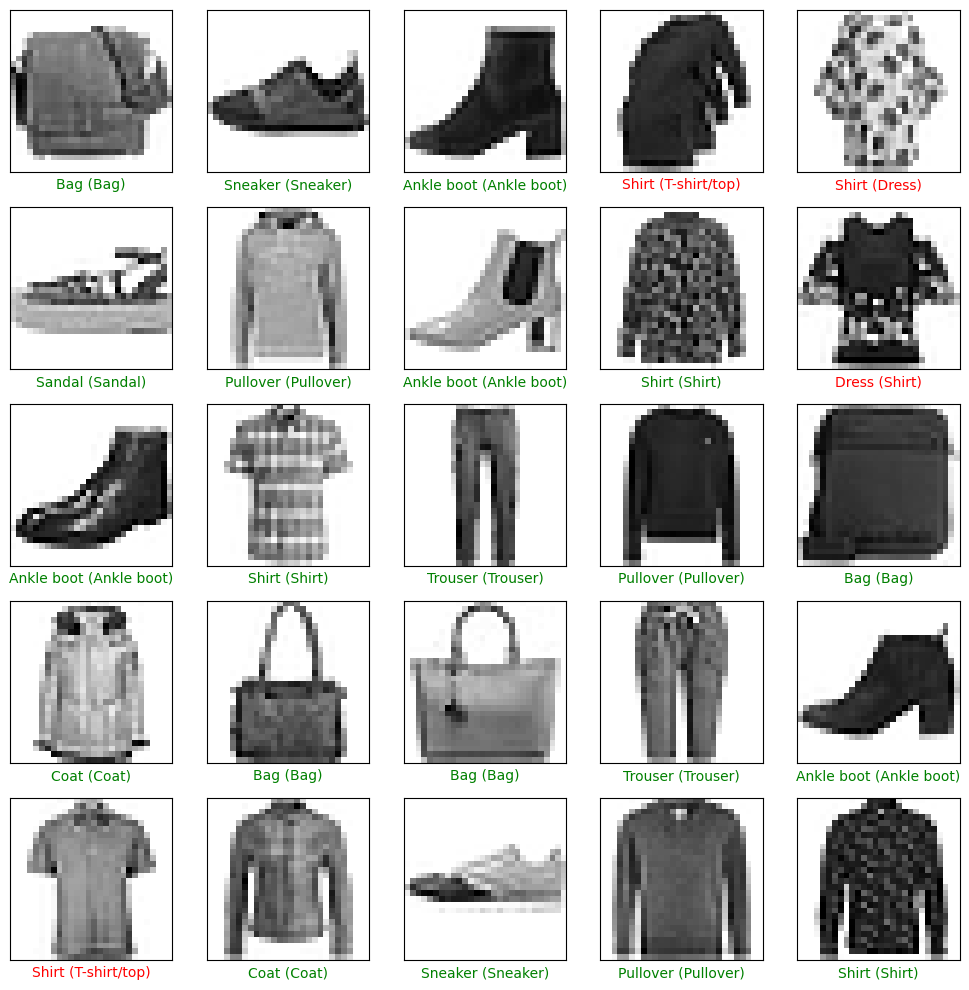

In [8]:
# ‚ÄÉ–í—ñ–∑—É–∞–ª—ñ–∑—É—î–º–æ 25 –≤–∏–ø–∞–¥–∫–æ–≤–∏—Ö –∑–æ–±—Ä–∞–∂–µ–Ω—å —ñ –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è
y_pred = predictions
# ‚ÄÉ–í–∏–≤–µ–¥–µ–Ω–Ω—è —Ç–æ—á–Ω–æ—Å—Ç—ñ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º—É –Ω–∞–±–æ—Ä—ñ
test_loss, test_acc = model.evaluate(x_test_rgb, y_test_cat, verbose=0)
print(f" –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: {test_acc:.2%}")

figure = plt.figure(figsize=(10, 10))
indices = np.random.choice(len(x_test), size=25, replace=False)

for i, idx in enumerate(indices):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]), cmap=plt.cm.binary)

    pred_idx = np.argmax(y_pred[idx])
    true_idx = y_test[idx]

    ax.set_xlabel(
        f"{class_names[pred_idx]} ({class_names[true_idx]})",
        color=("green" if pred_idx == true_idx else "red"),
    )

plt.tight_layout()
plt.show()

===========================
# 7. –ì—Ä–∞—Ñ—ñ–∫ –Ω–∞–≤—á–∞–Ω–Ω—è
===========================

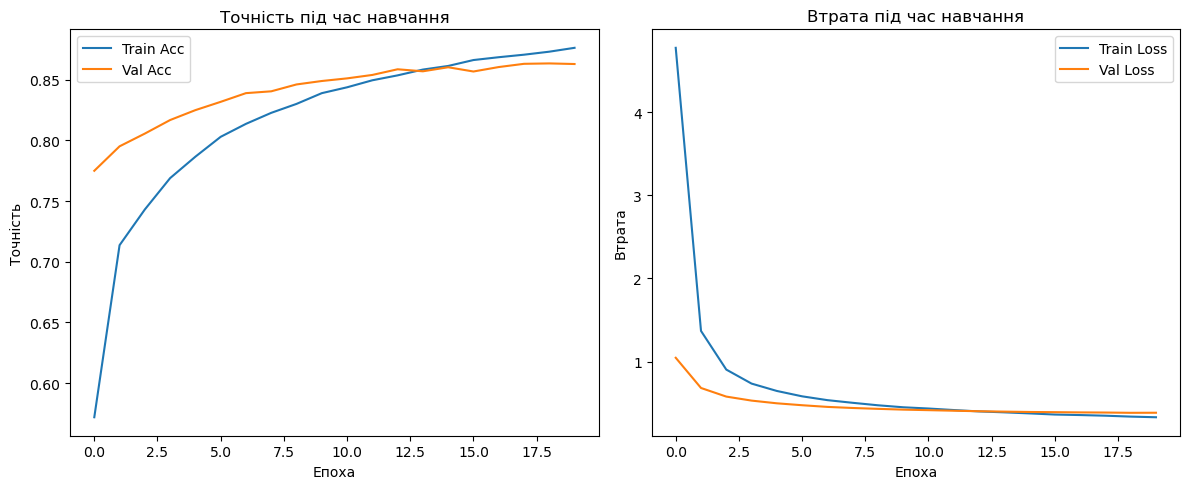

In [9]:
# –ì—Ä–∞—Ñ—ñ–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç—ñ —Ç–∞ –≤—Ç—Ä–∞—Ç–∏
plt.figure(figsize=(12, 5))

# –¢–æ—á–Ω—ñ—Å—Ç—å
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("–¢–æ—á–Ω—ñ—Å—Ç—å –ø—ñ–¥ —á–∞—Å –Ω–∞–≤—á–∞–Ω–Ω—è")
plt.xlabel("–ï–ø–æ—Ö–∞")
plt.ylabel("–¢–æ—á–Ω—ñ—Å—Ç—å")
plt.legend()

# –í—Ç—Ä–∞—Ç–∞
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("–í—Ç—Ä–∞—Ç–∞ –ø—ñ–¥ —á–∞—Å –Ω–∞–≤—á–∞–Ω–Ω—è")
plt.xlabel("–ï–ø–æ—Ö–∞")
plt.ylabel("–í—Ç—Ä–∞—Ç–∞")
plt.legend()

plt.tight_layout()
plt.show()

# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó Fashion-MNIST

---

## ‚úÖ 1. –ë–∞–∑–æ–≤–∞ CNN –∑ –Ω—É–ª—è

**–ê—Ä—Ö—ñ—Ç–µ–∫—Ç—É—Ä–∞:**
- Conv2D + MaxPooling
- Flatten ‚Üí Dense ‚Üí Softmax

**–†–µ–∑—É–ª—å—Ç–∞—Ç–∏:**
- –í–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: ~87%
- –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: ~86‚Äì87%

**–í–∏—Å–Ω–æ–≤–æ–∫:**
- –ë–∞–∑–æ–≤–∏–π —Ä—ñ–≤–µ–Ω—å.
- –ú–æ–¥–µ–ª—å –ø—Ä–æ—Å—Ç–∞ —ñ —Å—Ç–∞–±—ñ–ª—å–Ω–∞, –∞–ª–µ –Ω–µ –≤–∏—Ç—è–≥—É—î —Å–∫–ª–∞–¥–Ω—ñ –∑—Ä–∞–∑–∫–∏.
- –î–æ–±—Ä–µ –¥–ª—è —Å—Ç–∞—Ä—Ç—É, –∞–ª–µ —Ç–æ—á–Ω—ñ—Å—Ç—å –æ–±–º–µ–∂–µ–Ω–∞.

---

## ‚úÖ 2. VGG16 (–ø–µ—Ä–µ–¥–Ω–∞–≤—á–µ–Ω–∞, –∑–∞–º–æ—Ä–æ–∂–µ–Ω–∞)

**–ê—Ä—Ö—ñ—Ç–µ–∫—Ç—É—Ä–∞:**
- VGG16 (`include_top=False`, `trainable=False`)
- GlobalAveragePooling + Dense

**–†–µ–∑—É–ª—å—Ç–∞—Ç–∏:**
- –í–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: ~88.5%
- –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: ~88.3%

**–í–∏—Å–Ω–æ–≤–æ–∫:**
- –Ø–∫—ñ—Å—Ç—å –ø–æ–∫—Ä–∞—â–∏–ª–∞—Å—å –±–µ–∑ –Ω–∞–≤—á–∞–Ω–Ω—è —Å–∞–º–æ—ó VGG.
- –®–≤–∏–¥–∫–µ —Ç—Ä–µ–Ω—É–≤–∞–Ω–Ω—è.
- –ê–ª–µ —Ç–æ—á–Ω—ñ—Å—Ç—å —Å—Ç–∞–±—ñ–ª—ñ–∑—É–≤–∞–ª–∞—Å—å ‚Äî –¥–∞–ª—ñ –Ω–µ —Ä–æ—Å—Ç–µ.

---

## ‚úÖ 3. VGG16 + Fine-Tuning (—Ä–æ–∑–º–æ—Ä–æ–∂–µ–Ω–æ –æ—Å—Ç–∞–Ω–Ω—ñ 4 —à–∞—Ä–∏)

**–ê—Ä—Ö—ñ—Ç–µ–∫—Ç—É—Ä–∞:**
- –¢—ñ —Å–∞–º—ñ —à–∞—Ä–∏ + —Ä–æ–∑–º–æ—Ä–æ–∂–µ–Ω—ñ –æ—Å—Ç–∞–Ω–Ω—ñ 4 —à–∞—Ä–∏ VGG
- Learning rate: `1e-5`

**–†–µ–∑—É–ª—å—Ç–∞—Ç–∏:**
- –í–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: **92.3%**
- –¢–µ—Å—Ç–æ–≤–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å: **92.05%**
- –ù–∞–π–∫—Ä–∞—â—ñ –∫–ª–∞—Å–∏: `Sandal`, `Bag`, `Ankle boot`
- –°–ª–∞–±—à–∏–π –∫–ª–∞—Å: `Shirt` (~75%)

**–í–∏—Å–Ω–æ–≤–æ–∫:**
- –ù–∞–π–∫—Ä–∞—â–∞ –º–æ–¥–µ–ª—å ‚úÖ
- Fine-tuning –ø–æ–∫—Ä–∞—â–∏–≤ —Ç–æ—á–Ω—ñ—Å—Ç—å –Ω–∞ ~4%
- –ì–∞—Ä–Ω–∞ –≥–µ–Ω–µ—Ä–∞–ª—ñ–∑–∞—Ü—ñ—è, –±–µ–∑ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–Ω—è

---

## üèÜ –í–∏—Å–Ω–æ–≤–æ–∫

> **–ù–∞–π–∫—Ä–∞—â–∞ –º–æ–¥–µ–ª—å ‚Äî VGG16 –∑ Fine-Tuning**  
> ‚úîÔ∏è –ù–∞–π–≤–∏—â–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å  
> ‚úîÔ∏è –ê–¥–∞–ø—Ç–æ–≤–∞–Ω–∞ –¥–æ Fashion-MNIST  
> ‚úîÔ∏è –°—Ç–∞–±—ñ–ª—å–Ω–∞ —ñ —Ç–æ—á–Ω–∞


In [10]:
model.save("vgg16_finetuned.keras")